<a href="https://colab.research.google.com/github/nickwan/sliced-basics/blob/main/data_viz/sliced_basics_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SLICED BASICS: Data Visualization  
We take a look at data visualization basics and how to plot some quick-and-easy graphs that can perhaps gain you some points during SLICED. 

These aren't the most pretty or engaging data viz. If you are interested in more complex and aesthetically-pleasing data visualizations, come check out the stream live over on twitch:

https://twitch.tv/nickwan_datasci

SLICED starts June 1 and goes through Aug 17. SLICED is a competitive data science game show where 4 data scientists get a dataset they have never seen before and have to make a predictive model and data visualizations within two hours. TUESDAYS AT 8:30pm ET 



In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

from sklearn.model_selection import KFold, GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from scipy.stats import pearsonr, spearmanr

In [2]:
project_dir = "drive/My Drive/public-sliced/s00e01"
df = pd.read_csv(f"{project_dir}/Copy of sliced-s00e01-data.csv")
df.shape

(5934, 120)

In [9]:
df_corr = df.corr()
df_corr.loc[:, ['match']].sort_values('match').head(20)

,match
met_o,-0.116154
date,-0.075730
go_out,-0.071750
sinc4_1,-0.069700
pf_o_sha,-0.053708
shar1_1,-0.053649
age_o,-0.051370
condtn,-0.051078
age,-0.050226
imprace,-0.040756


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


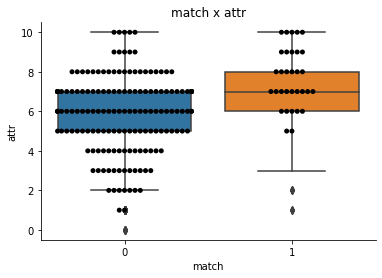

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


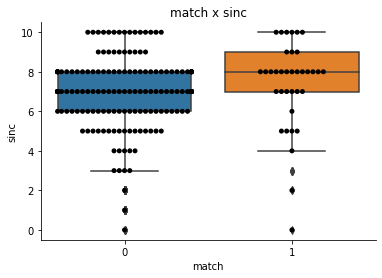

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


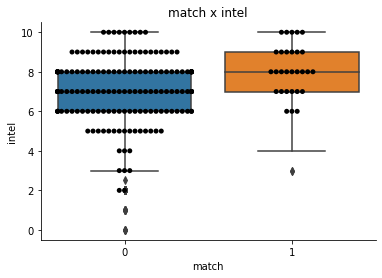

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


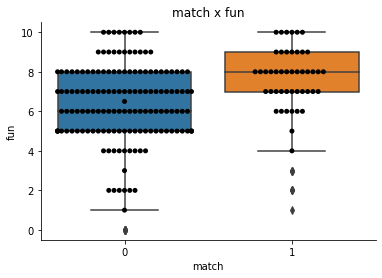

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


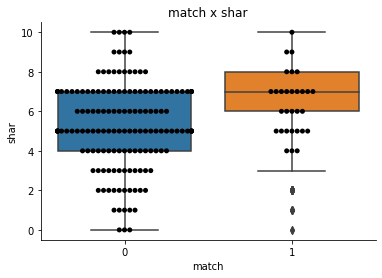

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


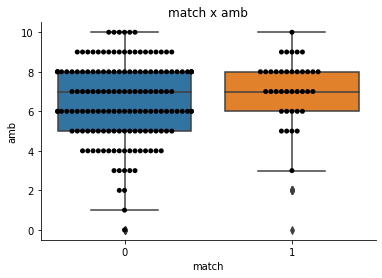

In [14]:
feats = ['attr', 'sinc', 'intel', 'fun', 'shar', 'amb']
for col in feats:
  sns.boxplot(data=df, x='match', y=col)
  sns.swarmplot(data=df.sample(200), x='match', y=col, color='k')
  plt.title(f"match x {col}")
  sns.despine()
  plt.show()

# modeling (covered in the modeling vid) 

In [15]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
feats = [f"{x}_o" for x in feats] + feats
target = 'match'
kf = KFold(10, shuffle=True)
model_data = df.loc[:, ['wave']+feats+[target]].dropna()

df_preds = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train_data = model_data.iloc[train_idx]
  test_data = model_data.iloc[test_idx]

  log_model = LogisticRegression()
  log_model.fit(train_data.loc[:, feats], train_data[target])
  test_data['preds'] = pd.DataFrame(log_model.predict_proba(test_data.loc[:, feats]), index=test_data.index)[1]
  df_preds = df_preds.append(test_data)
df_preds.shape  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

(4284, 15)

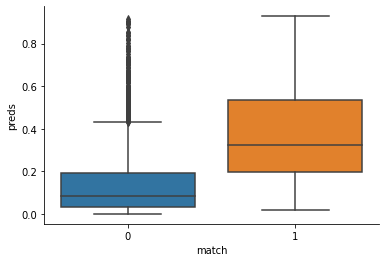

In [17]:
sns.boxplot(data=df_preds, x=target, y='preds')
sns.despine()
plt.show()

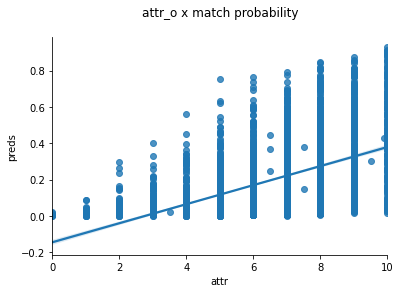

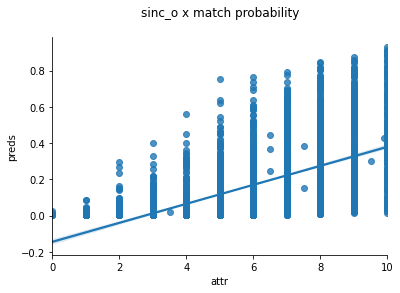

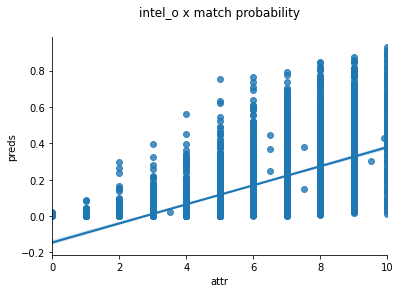

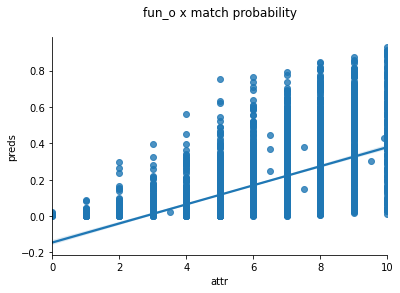

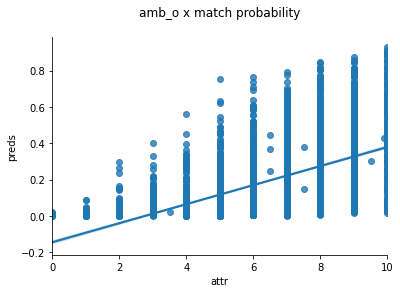

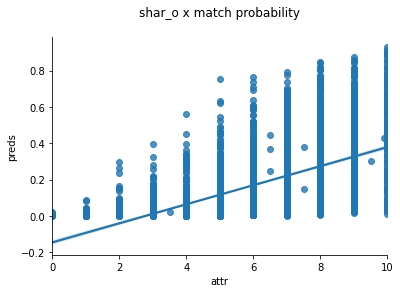

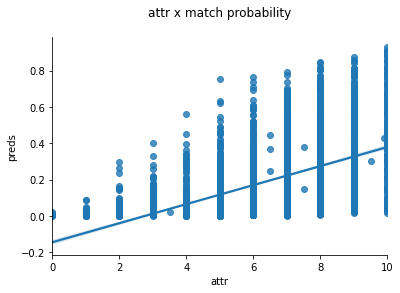

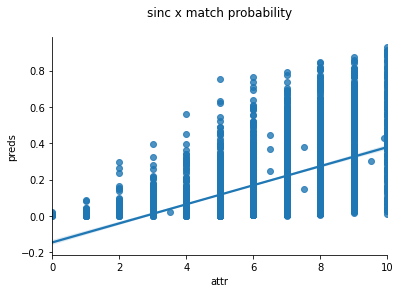

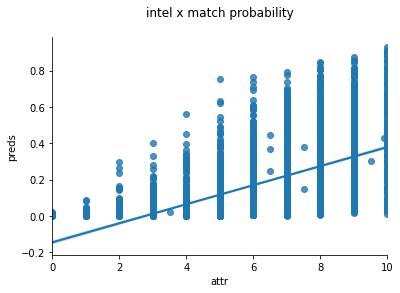

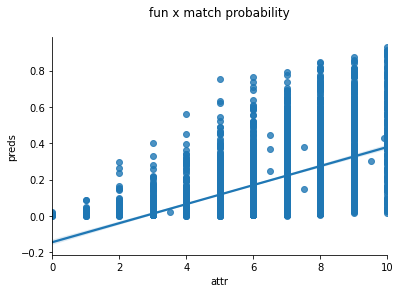

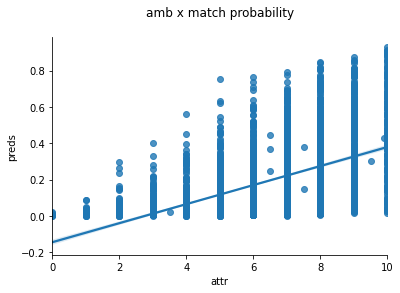

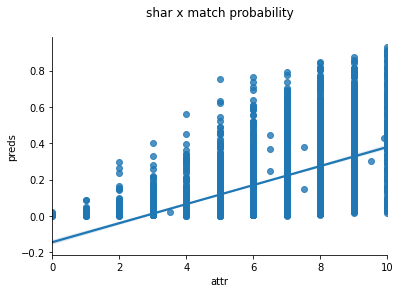

In [28]:
for col in feats:
  sns.regplot(data=df_preds, x='attr', y='preds')
  plt.title(f"{col} x match probability\n")
  sns.despine()
  plt.show()

# random non-model related data viz 

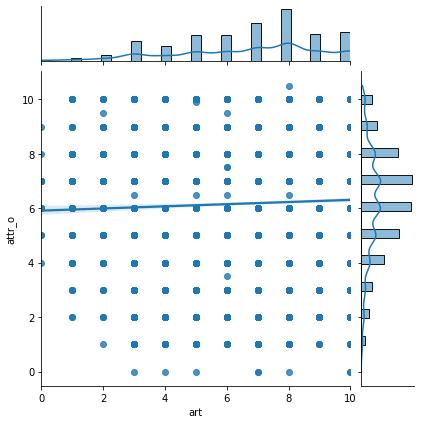

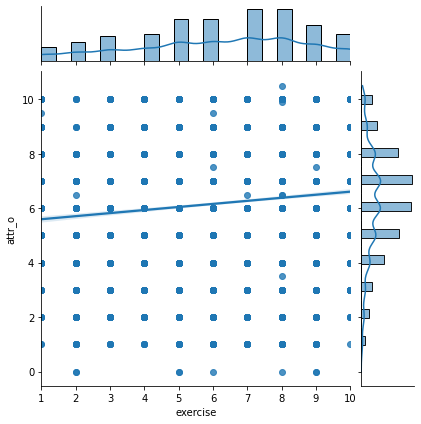

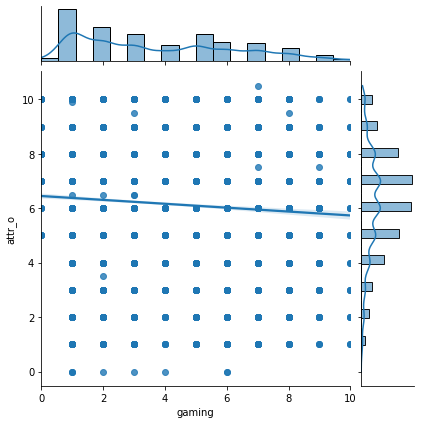

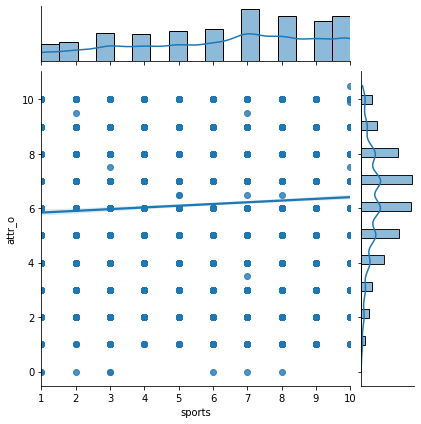

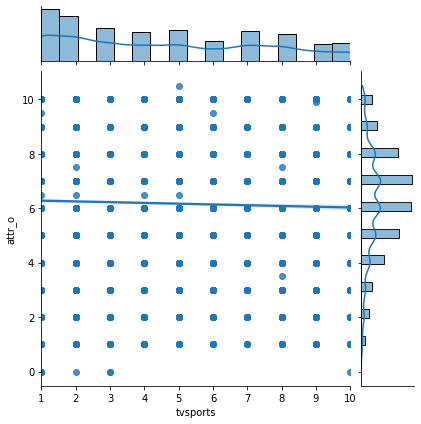

In [36]:
x = 'exercise'
for x in ['art', 'exercise', 'gaming', 'sports', 'tvsports']:
  df_plt = df.loc[df[x]<=10]
  sns.jointplot(data=df_plt, x=x, y='attr_o', kind='reg')
  sns.despine()
  plt.show()

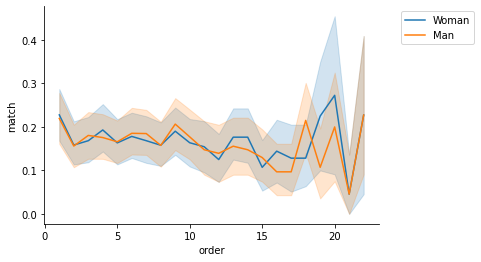

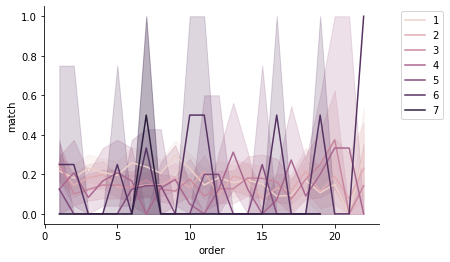

In [47]:
df_plt = df.copy()
df_plt['gender'] = df_plt['gender'].replace([0,1], ['Woman', 'Man'])
sns.lineplot(data=df_plt, x='order', y='match', hue='gender')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

sns.lineplot(data=df_plt, x='order', y='match', hue='go_out')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
